<a href="https://colab.research.google.com/github/Bone-Age-Maisha/paper_1/blob/main/unfreez_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import os
import pandas as pd
from six.moves import cPickle

In [ ]:
import pandas as pd
train_dir = '/content/drive/MyDrive/small_data/train'
df = pd.read_csv('/content/drive/MyDrive/small_data/train_csv1.csv')

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [ ]:
X_train = []
y_age = []
y_gender = []

#df = pd.read_csv('/raid/chenchao/code/BoneAge/BoneAge/data/Training.csv')
a = df.values
m = a.shape[0]

path = train_dir
k = 0
print ('Loading data set...')
k=1
for i in os.listdir(path):
  print(i)
  if(len(i)>9):   #errror occuring  so to 
    continue
  y_age.append(df.boneage[df.id == int(i[:-4])].tolist()[0])
  a = df.male[df.id == int(i[:-4])].tolist()[0]
  if a:
    y_gender.append(1)
  else:
     y_gender.append(0)
  img_path = path + "/"+i
  img = cv2.imread(img_path)
  #print(img.shape)
  #print (img_path)
  img = cv2.imread(img_path)
    #print (img_path)
    #if(img is not None):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(300,300))
  x = np.asarray(img, dtype=np.uint8)
  X_train.append(x)

Loading data set...
1378.png
1377.png
1379.png
1380.png
1381.png
1385.png
1383.png
1384.png
1382.png
1387.png
1388.png
1390.png
1391.png
1389.png
1395.png
1393.png
1394.png
1399.png
1398.png
1396.png
1402.png
1403.png
1400.png
1406.png
1405.png
1404.png
1408.png
1409.png
1407.png
1411.png
1412.png
1414.png
1416.png
1415.png
1419.png
1418.png
1417.png
1420.png
1423.png
1424.png
1422.png
1426.png
1427.png
1425.png
1429.png
1428.png
1430.png
1433.png
1434.png
1431.png
1432.png
1435.png
1437.png
1436.png
1439.png
1438.png
1440.png
1443.png
1442.png
1441.png
1445.png
1444.png
1446.png
1447.png
1448.png
1453.png
1451.png
1452.png
1454.png
1455.png
1457.png
.ipynb_checkpoints


In [ ]:
def softlabel(label,num_class):
    softlabel=np.zeros((len(label),num_class))
    ratio = 1.0/50
    for i in range(len(label)):
        for j in range(num_class):
            softlabel[i,j]=1.0 - ratio*np.abs(j-label[i])
    softlabel = np.maximum(softlabel,0)
    return softlabel

In [ ]:
y = np.asarray(y_age)
gender = np.asarray(y_gender)
x=np.asarray(X_train, dtype=np.float32)
x/255
gender =2*( gender-0.5)
x_final = []
y_final = []
gender_final = []

# Shuffle images and split into train, validation and test sets
#random_no = np.random.choice(x.shape[0], size=x.shape[0], replace=False)
random_no = np.arange(x.shape[0])
#print(random_no)
np.random.seed(0)
np.random.shuffle(random_no)
for i in random_no:
    x_final.append(x[i,:,:,:])
    y_final.append(y[i])
    gender_final.append(gender[i])

x_final = np.asarray(x_final)
y_final = np.asarray(y_final)
gender_final = np.asarray(gender_final)
print (y_final[:50])
print (gender_final[:50])
k = 10 # Decides split count
x_test = x_final[:k,:,:,:]
y_test = y_final[:k]
gender_test = gender_final[:k]
x_valid = x_final[k:2*k,:,:,:]
y_valid = y_final[k:2*k]
gender_valid = gender_final[k:2*k]
x_train = x_final[2*k:,:,:,:]
y_train = y_final[2*k:]
gender_train = gender_final[2*k:]

## 
#y_test = keras.utils.to_categorical(y_test,240)
#y_train = keras.utils.to_categorical(y_train,240)
#y_valid = keras.utils.to_categorical(y_valid,240)
y_train = softlabel(y_train,240)
y_valid = softlabel(y_valid,240)
y_test = softlabel(y_test,240)
print (y_train)


print ('x_train shape:'+ str(x_train.shape))
print ('y_train shape:'+ str(y_train.shape))
print ('gender_train shape:'+ str(gender_train.shape))
print ('x_valid shape:'+ str(x_valid.shape))
print ('y_valid shape:'+ str(y_valid.shape))
print ('gender_valid shape:' + str(gender_valid.shape))
print ('x_test shape:'+ str(x_test.shape))
print ('y_test shape:'+ str(y_test.shape))


[126 149 113 132 156 180 156  42 126 126  42  30  78 174  88 165  32 132
 156  82 192 170  94  32 156 120  60  33 126  54  27 108  94 162 120  21
 188  33 136  24   4  12 132  36  57  24  90 138 138 159]
[ 1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.
  1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.]
[[0.   0.   0.   ... 0.1  0.08 0.06]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.02 0.04 ... 0.   0.   0.  ]
 [0.52 0.54 0.56 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
x_train shape:(51, 300, 300, 3)
y_train shape:(51, 240)
gender_train shape:(51,)
x_valid shape:(10, 300, 300, 3)
y_valid shape:(10, 240)
gender_valid shape:(10,)
x_test shape:(10, 300, 300, 3)
y_test shape:(10, 240)


In [ ]:
from visualization import *
import numpy as np
import cv2
from keras import backend as K
from keras.preprocessing import image
import os


def ShowAttentionV1(model,image_path):
    file_list = os.listdir(image_path)
    file_list.sort()
    for filename in file_list:
        print (filename)
        filepath=image_path+filename
        image=load_image(filepath)
        image = image/255.0
        gender=1.0
        gender=np.asarray(gender)
        gender=np.expand_dims(gender,axis=0)
        layer=K.function([model.layers[0].input],[model.layers[196].output])
        FeatureMap=layer([image,gender])[0]
        print (FeatureMap.shape)
        FeatureMap = np.squeeze(FeatureMap, axis=0)
        FeatureMap = np.abs(FeatureMap)
        heatmap = np.mean(FeatureMap,axis=2)
        heatmap = heatmap/np.max(heatmap)
        heatmap = np.uint8(255*heatmap)
        print (heatmap.shape)
        heatmap = cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
        SaveImg(filename,filepath,heatmap)
    print ('********** Done ***********')




def GAPAttention(model,weights,image_path):
    file_list = os.listdir(image_path)
    file_list.sort()
    for filename in file_list:
        filepath=image_path+filename
        print (filepath)
        image=load_image(filepath)
        print("gpa")
        print(image.shape)
        image = image/255.0
        gender=1.0
        gender=np.asarray(gender)
        gender=np.expand_dims(gender,axis=0)
        print("ok")
        layer=K.function([model.layers[0].input],[model.layers[1].get_output_at(-1),model.layers[-1].output])
        print("ok_1")
        GAP,prediction=layer([image])
        print("ok_2")
        GAP=np.squeeze(GAP,axis=0)
        print("ok_3")
        print (GAP.shape)
        print("ok_4")
        index = np.argmax(prediction)
        print("ok_5")
        print (index)
       # weight = weights[:,index]
        weight =np.mean(weights[:,index-5:index+5],axis=1)
        heatmap = np.zeros((GAP.shape[0],GAP.shape[1]))
        for k in range(GAP.shape[2]):
            heatmap = heatmap + weight[k]*GAP[:,:,k]
        heatmap = heatmap/np.max(heatmap)
        heatmap = np.uint8(255*heatmap)
        print (heatmap.shape)
        heatmap = cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
        SaveImg(filename,filepath,heatmap)
    print ('********** Done ***********')



def SaveImg(filename,filepath,heatmap):
    img = cv2.imread(filepath)
    heatmap = cv2.resize(heatmap,(img.shape[1],img.shape[0]))
    AttentionImg =0.5* heatmap + img
    cv2.imwrite('/content/heat'+filename,heatmap)
    cv2.imwrite('/content/attention'+filename,AttentionImg)


def load_image(path):
    img = cv2.imread(path)
    print(img.shape)
    img = cv2.resize(img,(300,300))
    print(img.shape)
    x = np.asarray(img, dtype=np.float32)
   # img = image.load_img(path, target_size=(448, 448))
   # print (img.shape)
   # x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return x

def TestMAE(model,test_data,test_label,test_gender):
    test_gender = np.array(test_gender)
    test_gender = np.expand_dims(test_gender,axis=1)
    layer=K.function([model.layers[0].input,model.layers[3].input],[model.layers[-1].output])
    predictions=layer([test_data,test_gender])
    predictions = np.array(predictions)
    predictions = np.squeeze(predictions,axis=0)
    print (predictions.shape)
    predict_label = np.argmax(predictions,axis=1)
    test_label = np.argmax(test_label,axis=1)
    print (predict_label)
    print (test_label)
    TestMAE = np.mean(np.abs(predict_label-test_label))
    return TestMAE



def DataAugment(x_train):
    x_train_Aug = np.zeros(x_train.shape)
    for i in range(x_train.shape[0]):
        for j in range(3):
            img = x_train[i,:,:,j]
            img = RandomMask(img)
            img = RandomMask(img)
            if np.random.random()>-1:
                x_train_Aug[i,:,:,j]=img 
            else:
                x_train_Aug[i,:,:,j]=x_train[i,:,:,j]
    return x_train_Aug


def RandomMask(img):
    m,n=img.shape
    m=int(m/6)
    n=int(n/6)
    i,j = np.random.randint(0,6,2)
    img[i*m:(i+1)*m,j*n:(j+1)*n]=np.random.random()
    return img



In [ ]:
!pip install visualization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 6.1 MB/s 
     |████████████████████████████████| 116 kB 73.8 MB/s 
     |████████████████████████████████| 663 kB 55.9 MB/s 
     |████████████████████████████████| 109 kB 70.1 MB/s 
     |████████████████████████████████| 115 kB 76.4 MB/s 
     |████████████████████████████████| 966 kB 50.4 MB/s 
     |████████████████████████████████| 978 kB 59.4 MB/s 
     |████████████████████████████████| 2.2 MB 57.6 MB/s 
     |████████████████████████████████| 500 kB 68.0 MB/s 
     |████████████████████████████████| 1.0 MB 60.9 MB/s 
     |████████████████████████████████| 40 kB 6.4 MB/s 
     |████████████████████████████████| 98 kB 9.5 MB/s 
     |████████████████████████████████| 212 kB 70.1 MB/s 
     |████████████████████████████████| 1.1 MB 63.7 MB/s 
     |████████████████████████████████| 107 kB 70.2 MB/s 
  Created wheel for PyOpenGL: filena

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
#from func_utils import *
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"
#os.environ['OMP_NUM_THREADS']='6'
batch_size = 32
epochs = 30

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)
#for i,layer in enumerate(base_model.layers):
    #print (i,layer.name)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(3,3))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = keras.layers.Conv2D(256,kernel_size=(1,1))(x)
print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(8,8))(output)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(240)(x)

(None, 10, 10, 2048)
(None, 1, 1, 2048)
(None, 2064)


In [ ]:
model = Model(inputs=[input,input_gender], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])

# Save weights after every epoch
#dr='/content/drive/MyDrive/Colab Notebooks/weights'
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=30)
history=model.fit([x_train,gender_train],y_train,batch_size=batch_size,epochs=100,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])

0 input1
1 resnet50
2 max_pooling2d_18
3 flatten_6
4 input2
5 dense_13
Epoch 1/100
2/2 [==============================] - 8s 1s/step - loss: 0.2012 - MAE: 0.2012 - val_loss: 0.4090 - val_MAE: 0.4090
Epoch 2/100
2/2 [==============================] - 1s 455ms/step - loss: 0.2014 - MAE: 0.2014 - val_loss: 0.4212 - val_MAE: 0.4212
Epoch 3/100
2/2 [==============================] - 1s 454ms/step - loss: 0.2023 - MAE: 0.2023 - val_loss: 0.4231 - val_MAE: 0.4231
Epoch 4/100
2/2 [==============================] - 1s 449ms/step - loss: 0.2021 - MAE: 0.2021 - val_loss: 0.4175 - val_MAE: 0.4175
Epoch 5/100
2/2 [==============================] - 1s 450ms/step - loss: 0.2019 - MAE: 0.2019 - val_loss: 0.4283 - val_MAE: 0.4283
Epoch 6/100
2/2 [==============================] - 1s 452ms/step - loss: 0.2013 - MAE: 0.2013 - val_loss: 0.4375 - val_MAE: 0.4375
Epoch 7/100
2/2 [==============================] - 1s 450ms/step - loss: 0.2015 - MAE: 0.2015 - val_loss: 0.4357 - val_MAE: 0.4357
Epoch 8/100
2/2

In [ ]:
base_model1 = InceptionV3(weights='imagenet', include_top=False)
for i,layer in enumerate(base_model1.layers):
    print (i,layer.name)
input1 = Input(shape=(300,300,3),name='input1')
input_gender1 = Input(shape=(1,),dtype='float32',name='input2')
output1 = base_model1(input1)
gender_embedding1=Dense(16)(input_gender1)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(3,3))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = keras.layers.Conv2D(256,kernel_size=(1,1))(x)
print (K.int_shape(output1))
x1 = keras.layers.MaxPooling2D(pool_size=(8,8))(output1)
print (K.int_shape(x))
x1=Flatten()(x1)
f = keras.layers.Concatenate(axis=1)([x1,gender_embedding1])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
prediction1 = Dense(240)(x1)

model1 = Model(inputs=[input1,input_gender1], outputs=prediction1)
for i,layer in enumerate(model1.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0003,beta_1=0.9,beta_2=0.999)
model1.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])

# Save weights after every epoch
#dr='/content/drive/MyDrive/Colab Notebooks/weights'
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=30)
history1=model1.fit([x_train,gender_train],y_train,batch_size=batch_size,epochs=100,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])

0 input_10
1 conv2d_470
2 batch_normalization_470
3 activation_470
4 conv2d_471
5 batch_normalization_471
6 activation_471
7 conv2d_472
8 batch_normalization_472
9 activation_472
10 max_pooling2d_29
11 conv2d_473
12 batch_normalization_473
13 activation_473
14 conv2d_474
15 batch_normalization_474
16 activation_474
17 max_pooling2d_30
18 conv2d_478
19 batch_normalization_478
20 activation_478
21 conv2d_476
22 conv2d_479
23 batch_normalization_476
24 batch_normalization_479
25 activation_476
26 activation_479
27 average_pooling2d_45
28 conv2d_475
29 conv2d_477
30 conv2d_480
31 conv2d_481
32 batch_normalization_475
33 batch_normalization_477
34 batch_normalization_480
35 batch_normalization_481
36 activation_475
37 activation_477
38 activation_480
39 activation_481
40 mixed0
41 conv2d_485
42 batch_normalization_485
43 activation_485
44 conv2d_483
45 conv2d_486
46 batch_normalization_483
47 batch_normalization_486
48 activation_483
49 activation_486
50 average_pooling2d_46
51 conv2d_482
5

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


(None, 8, 8, 2048)
(None, 2048)
(None, 2064)
0 input1
1 inception_v3
2 max_pooling2d_33
3 flatten_9
4 input2
5 dense_19
Epoch 1/100
2/2 [==============================] - 9s 2s/step - loss: 2.1989 - MAE: 2.1989 - val_loss: 4.8638 - val_MAE: 4.8638
Epoch 2/100
2/2 [==============================] - 1s 344ms/step - loss: 0.7951 - MAE: 0.7951 - val_loss: 4.2771 - val_MAE: 4.2771
Epoch 3/100
2/2 [==============================] - 1s 343ms/step - loss: 0.4595 - MAE: 0.4595 - val_loss: 5.5066 - val_MAE: 5.5066
Epoch 4/100
2/2 [==============================] - 1s 341ms/step - loss: 0.3643 - MAE: 0.3643 - val_loss: 7.3969 - val_MAE: 7.3969
Epoch 5/100
2/2 [==============================] - 1s 344ms/step - loss: 0.2996 - MAE: 0.2996 - val_loss: 8.2591 - val_MAE: 8.2591
Epoch 6/100
2/2 [==============================] - 1s 348ms/step - loss: 0.2765 - MAE: 0.2765 - val_loss: 7.5952 - val_MAE: 7.5952
Epoch 7/100
2/2 [==============================] - 1s 343ms/step - loss: 0.2522 - MAE: 0.2522 - v

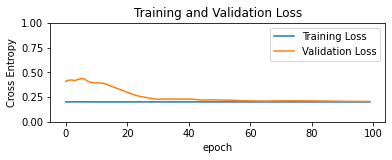

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

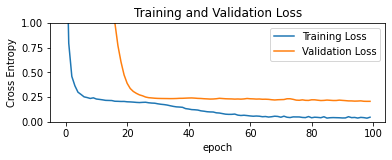

In [ ]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model11 = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model11.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(base_model11.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model11.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  175


In [ ]:
for i,layer in enumerate(base_model11.layers):
    print (i,layer.name)
input11 = Input(shape=(300,300,3),name='input1')
input_gender11 = Input(shape=(1,),dtype='float32',name='input2')
output11 = base_model11(input11)
gender_embedding11=Dense(16)(input_gender11)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(3,3))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = keras.layers.Conv2D(256,kernel_size=(1,1))(x)
print (K.int_shape(output11))
x11 = keras.layers.MaxPooling2D(pool_size=(8,8))(output11)
print (K.int_shape(x11))
x11=Flatten()(x11)
f11 = keras.layers.Concatenate(axis=1)([x11,gender_embedding11])
print (K.int_shape(f11)) 
#x = Dense(256, activation='relu')(x)
prediction11 = Dense(240)(x11)

model11 = Model(inputs=[input11,input_gender11], outputs=prediction11)
for i,layer in enumerate(model11.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0003,beta_1=0.9,beta_2=0.999)
model11.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
len(model11.trainable_variables)

92

In [ ]:
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=30)
history11=model11.fit([x_train,gender_train],y_train,batch_size=batch_size,epochs=100,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])

Epoch 1/100
2/2 [==============================] - 19s 4s/step - loss: 6.0222 - MAE: 6.0222 - val_loss: 2.6998 - val_MAE: 2.6998
Epoch 2/100
2/2 [==============================] - 1s 276ms/step - loss: 2.4443 - MAE: 2.4443 - val_loss: 2.0727 - val_MAE: 2.0727
Epoch 3/100
2/2 [==============================] - 1s 273ms/step - loss: 1.3692 - MAE: 1.3692 - val_loss: 1.7680 - val_MAE: 1.7680
Epoch 4/100
2/2 [==============================] - 1s 280ms/step - loss: 0.8236 - MAE: 0.8236 - val_loss: 1.8187 - val_MAE: 1.8187
Epoch 5/100
2/2 [==============================] - 1s 277ms/step - loss: 0.5085 - MAE: 0.5085 - val_loss: 2.1730 - val_MAE: 2.1730
Epoch 6/100
2/2 [==============================] - 1s 279ms/step - loss: 0.3515 - MAE: 0.3515 - val_loss: 2.9238 - val_MAE: 2.9238
Epoch 7/100
2/2 [==============================] - 1s 274ms/step - loss: 0.2758 - MAE: 0.2758 - val_loss: 4.1629 - val_MAE: 4.1629
Epoch 8/100
2/2 [==============================] - 1s 277ms/step - loss: 0.2403 - MAE

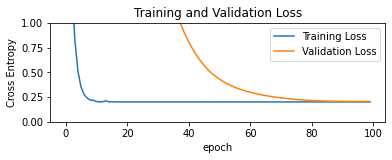

In [ ]:
loss = history11.history['loss']
val_loss = history11.history['val_loss']

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model12 = ResNet50(weights='imagenet', include_top=False)
base_model12.trainable = True
print("Number of layers in the base model: ", len(base_model12.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model12.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  175


In [ ]:
from __future__ import print_function
attention_module = 'cbam_block'
model_type = base_model12 if attention_module==None else attention_module

In [ ]:
from models import resnet_v1, resnet_v2, mobilenets, inception_v3, inception_resnet_v2

depth = 20 # For ResNet, specify the depth (e.g. ResNet50: depth=50)
model = resnet_v1.resnet_v1(input_shape=input_shape, depth=depth, attention_module=attention_module)

ModuleNotFoundError: ignored